In [1]:
!pip install fbprophet

In [2]:
import pandas as pd 

In [3]:
from fbprophet import Prophet 
%matplotlib inline

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/Miles_Traveled.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [6]:
df.columns = ['ds','y']

In [7]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [11]:
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

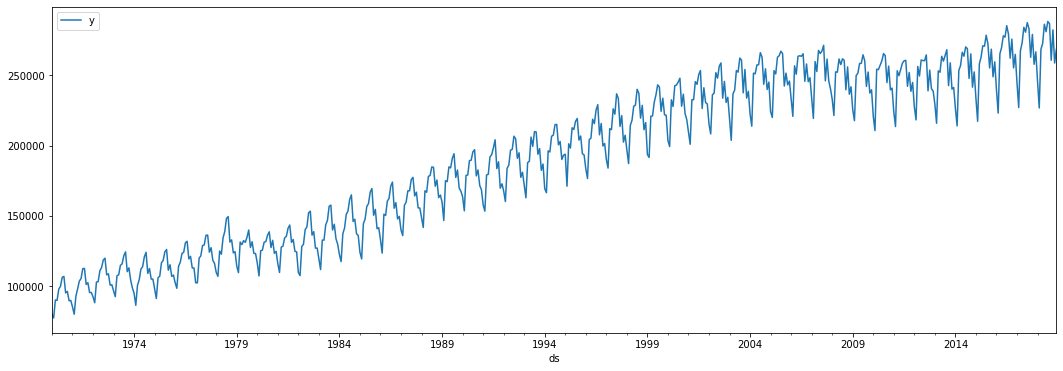

In [12]:
df.plot(x = 'ds',y='y',figsize = (18,6))

In [14]:
len(df)

588

In [15]:
len(df)-12

576

In [16]:
train = df.iloc[:576]
test = df.iloc[576:]

In [17]:
m = Prophet()

In [18]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe(periods = 12,freq='MS')
forecast = m.predict(future)

In [21]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263225.799089,274181.539197,285423.081402,263174.686054,263271.697119,16448.965321,16448.965321,16448.965321,16448.965321,16448.965321,16448.965321,0.0,0.0,0.0,279674.764410
584,2018-09-01,263364.447580,256482.701368,267869.560915,263273.839356,263447.967677,-1668.389366,-1668.389366,-1668.389366,-1668.389366,-1668.389366,-1668.389366,0.0,0.0,0.0,261696.058214
585,2018-10-01,263498.623539,262790.300860,274801.231307,263378.704737,263628.975672,5307.758728,5307.758728,5307.758728,5307.758728,5307.758728,5307.758728,0.0,0.0,0.0,268806.382266
586,2018-11-01,263637.272030,249628.224566,261676.975310,263474.988216,263802.579747,-8206.579994,-8206.579994,-8206.579994,-8206.579994,-8206.579994,-8206.579994,0.0,0.0,0.0,255430.692035
587,2018-12-01,263771.447989,251370.249020,262925.248270,263573.150151,263982.781588,-6920.037048,-6920.037048,-6920.037048,-6920.037048,-6920.037048,-6920.037048,0.0,0.0,0.0,256851.410940


<AxesSubplot:xlabel='ds'>

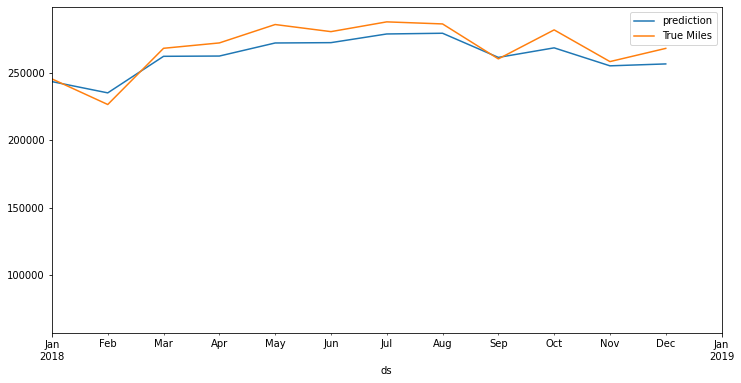

In [23]:
ax = forecast.plot(x ='ds',y='yhat',label ='prediction',legend = True,figsize = (12,6))
test.plot(x='ds',y='y',label='True Miles',legend = True,ax =ax,xlim=('2018-01-01','2019-01-01'))


In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
predictions = forecast.iloc[-12:]['yhat']

In [26]:
rmse(predictions,test['y'])

8747.311636227249